**Title:** Employee Performance Analysis and Prediction at INX Future Inc          

**Objective:** The aim of this project is to analyze and predict employee performance based on various factors that are demographic, job related and satisfaction based.
The project aims to understand the factors that affect employee performamce and build predictive models to help in optimization of employee satisfaction and the general organizational performance.

In [38]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
df = pd.read_excel('/content/drive/My Drive/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8 (2).xls')
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [41]:
#get a html report
#report= data.profile_report()
#report.to_file(output_file=report.html)

In [42]:
#get data information
#Summary Statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

**Dataset Overview**         
The dataset consists of:     
Total entries(Rows): 1200       
Data columns: 28       
Data types: Numerical(19) and Categorical(9 object)     

**Column Names Description**      
**Categorical**
1. EmpNumber: Employee Identifier   
2. Gender: Gender of Employee
3. EducationBackground: Employee's field of education
4. MaritalStatus: Employee's marital status
5. EmpDepartment: Department where the employee works
6. EmpJobRole: Employee's specific role
7. BusinessTravelFrequency: Business travel frequency required
8. Overtime: Shows wheteher the employee worked overtime
9. Attrition: Shows whether the employee has left the organization

**Numerical**
1. Age: Age of employee
2. DistanceFromHome: Distance from employee's residence to the workplace
3. EmpEducationalLevel: Employee's level of education
4. EmpEnvironmentSatisfaction: Employee's satisfaction level with environment.
5. EmpHourlyRate: Hourly pay rate of employees
6. EmpJobInvolvement: Level of employee job involvement
7. EmpJobLevel: Employee job level
8. EmpJobSatisfaction: Employee level of job satisfaction
9. NumCompaniesWorked: Number of companies an employee has worked for.
10. EmpLastSalaryHikePercent: Percentage of salary hike
11. EmpRelationshipSatisfaction: Level of satisfaction with relationships at work
12. TotalWorkExperienceInYears: Employee's years of work experience
13. TrainingTimesLastYear: Number of training attended by employee last year
14. EmplWorkLifeBalance: Employee work life balance satisfaction level
15. ExperienceYearsAtThisCompany: Employee's years of experience at the current company
16. ExperienceYearsInCurrentRole: Employee's years of experience in current role
17. YearsSinceLastPromotion: Number of years since the last promotion
18. YearsWithCurrManager: Number of years with the current manager.
19. PerformanceRating: Employee's performance rating

In [43]:
#Summary for Numerical Features
print (df.describe())

               Age  DistanceFromHome  EmpEducationLevel  \
count  1200.000000       1200.000000         1200.00000   
mean     36.918333          9.165833            2.89250   
std       9.087289          8.176636            1.04412   
min      18.000000          1.000000            1.00000   
25%      30.000000          2.000000            2.00000   
50%      36.000000          7.000000            3.00000   
75%      43.000000         14.000000            4.00000   
max      60.000000         29.000000            5.00000   

       EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
count                 1200.000000    1200.000000        1200.000000   
mean                     2.715833      65.981667           2.731667   
std                      1.090599      20.211302           0.707164   
min                      1.000000      30.000000           1.000000   
25%                      2.000000      48.000000           2.000000   
50%                      3.000000      66.

**Summary of Key Numerical Features**
1. Age Distribution has a mean of 36.92 years, Standard Deviation of 9.09 years and a range of 18 to 60 years with majority of employees falling between 30 to 43 years, the median age being 36 years.
2. Distance from home has a mean of 9.17 miles, standard deviation of 8.18 miles with a range from 1 to 29 miles, median 7 miles.
3. Education level has a mean of 2.89 with a range of 1 to 5. Majority of the employees have college education-level 2 and bachelors degree-level 4
4. Job satisfaction Environment   
Employee job satisfaction ranges from 1 (low satisfaction) to 4 (high satisfaction) with a mean of 2.73    
Employee job Environment satisfaction ranges from 1 (low satisfaction) to 4 (high satisfaction) with a mean of 2.72
Employee job Involvement ranges from 1 (low invovement) to 4 (high involvement) with a mean of 2.73    
Employee worklife balance  ranges from 1 (poor balance) to 4 (good balance) with a mean of 2.74
5. Work Experience    
Total Work Experience in Years ranges from 0 to 40 years witha a mean of 11.33 years    
Experience Years at this company ranges from 0 to 40 years witha a mean of 7.08 years    
Experience Years current role ranges from 0 to 18 years witha a mean of 4.29 years     
Years with current manager ranges from 0 to 17 years witha a mean of 4.11 years      
Years since last promotion ranges from 0 to 15 years witha a mean of 2.19 years
5. Performance Rating    
Majority of employees have a performance rating of 3 with a range of 2 to 4. The mean and standard devaition are 2.95 and 0.52 respectively
6. Employee Hourly Rate has an average of 66 dollars hour with a range of 30 to 100 dollars

**Insights**
Job satisfaction and work life balance are at moderate levels.
The employees age distribution is relatively balanced with significant variation in tenure work and experience.
There is potential areas for improvement since most employees fall within average performance.



In [44]:
# Defining the list of categorical columns
categorical_columns = ['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment',
                       'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)
print(df_encoded)

     EmpNumber  Age  DistanceFromHome  EmpEducationLevel  \
0     E1001000   32                10                  3   
1     E1001006   47                14                  4   
2     E1001007   40                 5                  4   
3     E1001009   41                10                  4   
4     E1001010   60                16                  4   
...        ...  ...               ...                ...   
1195   E100992   27                 3                  1   
1196   E100993   37                10                  2   
1197   E100994   50                28                  1   
1198   E100995   34                 9                  3   
1199   E100998   24                 3                  2   

      EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
0                              4             55                  3   
1                              4             42                  3   
2                              4             48                  2   

In [45]:
#Numerical Columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns.to_list()
print(numerical_columns)

['Age', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating']


In [46]:
#Checking for Missing Values
missing_values = df.isnull().sum()
print("missing_values:\n", missing_values)

missing_values:
 EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64


**Missing Values**    
The dataset has no missing values meaning that it is well suited for analysis and modelling

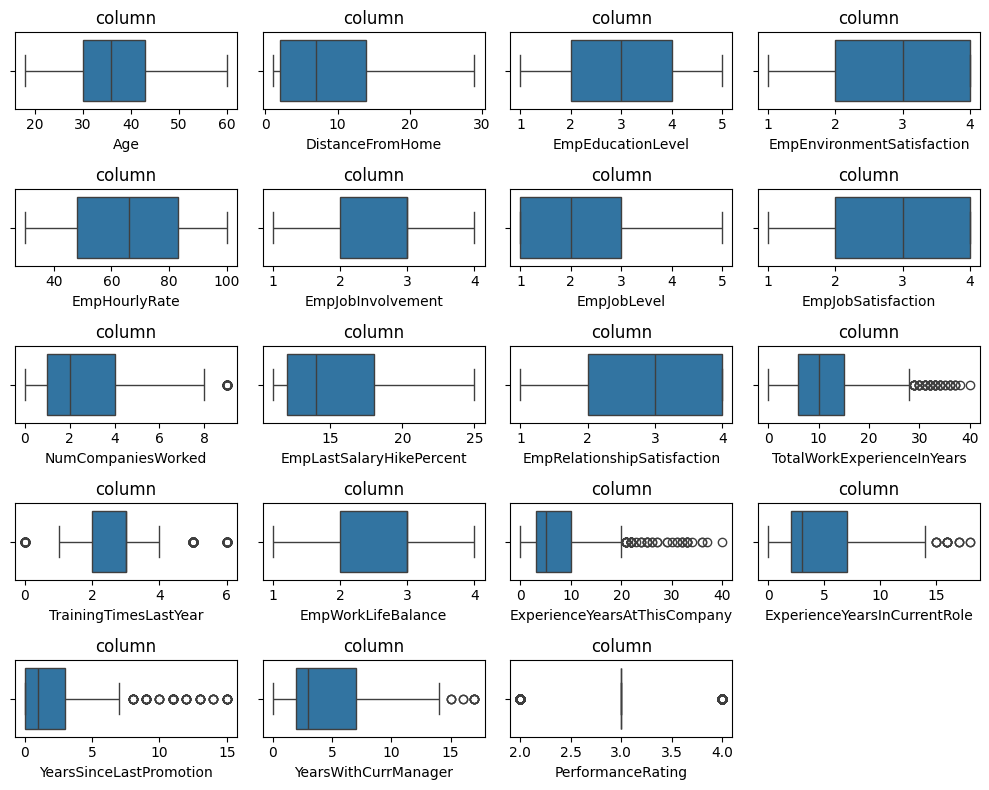

In [47]:
#Checking for Outliers
numerical_cols=df.select_dtypes (include='int64').columns
plt.figure(figsize=(10,8))
for i, column in enumerate(numerical_cols):
    plt.subplot(5,4,i+1)
    sns.boxplot(x=df [column])
    plt.title('column')
    plt.tight_layout()
plt.show()

**Checking for Outliers**   
Boxplots have been applied to detect the outliers to inspect distribution of numerical data and spot potential anomalities.
From the boxplots outliers are under Total work experience years, Number of companies worked for, Training time last year, Experience years at this company, Experience years in current role, Years since last promotion, Years with current manager and Performance rating


In [48]:
#Z-Scores for numerical Values
import scipy.stats as stats
z_scores=stats.zscore(df.select_dtypes(include='int64'))

#Outliers using 3 standard deviation threshold
outliers = df[(z_scores > 3).any(axis=1)]

#Remove Outliers
df_no_outliers = df[(z_scores <= 3).all(axis=1)]

**Outliers Cleaning**     
The data contained outliers which have been cleaned using Z-Score

In [49]:
df_transformed=np.log1p(df.select_dtypes(include='int64'))

In [50]:
#Data Training and Testing
#Features(X) and Target(Y)
X = df.drop('PerformanceRating', axis=1)
y = df['PerformanceRating']

#Split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Shapes of Split Data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (960, 27)
X_test shape: (240, 27)
y_train shape: (960,)
y_test shape: (240,)


**Data Split**       
Data split into training nad testing sets is for the purpose of evaluating the model performance.      
X-train and y-train are for the train model. With the 27 features consistency in the input dimensions between training and testing is ensured.
X-test shows how well the model generalizes unseen data    
y-test gives ground for evaluation       
Having 960 samples for training and 240 samples for testing ensures that there is data for training while retaining sufficient data for testing as well and asses model performance effectively.


In [51]:
#Model Training
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Identify numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(exclude=['number']).columns

# Create transformers for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

In [52]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Handle missing values in categorical columns
    ('onehot', OneHotEncoder(handle_unknown='ignore'))]) # One-hot encode categorical features

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Create a pipeline that includes preprocessing and the Random Forest model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', RandomForestClassifier())])

# Fit the pipeline to your training data
pipeline.fit(X_train, y_train)

# Evaluate the model
print('Model Accuracy:', pipeline.score(X_test, y_test))

Model Accuracy: 0.8125


**Data Processing**    
Numerical data is standardized using to scale each feature to ahve a mean of 0 and variable of 1     
Categorical data encoded using OneHotEncoder to transform categorical features into binary vectors hence each category becomes a separate binary feature.     
ColumnTransformer combines numerical and categorical data processing steps for appropriate handling of each data type before being fed in the model.  
Random forest classifier is used to build multiple decision trees during training and predictions     
Pipeline construction makes it easier to manage and apply consistent transformations to the data by combining the processing and classifier into a single pipeline.   
The model accuracy is 0.8125 meaning the model correctly predicts 81.25% of the samples in the test set which is a good predictive accuracy.


In [53]:
#Data Validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(pipeline,X_train,y_train,cv=5,scoring='r2')
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.21126761 0.28638498 0.39906103 0.23004695 0.15492958]
Average cross-validation score: 0.2563380281690141


**Cross Validation**        
The score range from 0.1555 to 0.399 across the 5 folds indicates the model captures a reasonable amount of variance in the dataset which can give insights into how robust the model is or moderate ability to explain variance under different subsets with an average of 0.2563.

In [54]:
#Evaluation
#Regression Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred=pipeline.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test,y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test,y_pred))
print("R-Squared:", r2_score(y_test,y_pred))

Mean Squared Error: 0.1875
Mean Absolute Error: 0.1875
R-Squared: 0.19618934206609107


**Evaluation**     
Mean squared error of 0.1875 means that the squared difference between predicted and actual values is low hence good model performance.    
Mean absolute error of 0.1875 means the models predictions are off by 0.1875 units from actual values.      
R-Squared of 0.1962 shows that the model explains only 19.62% of the variance in the target variable suggesting availability of room for improvement in capturing the underlying patterns.

In [55]:
#Classification Metrics
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

y_pred=pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Classification Report:")
print(classification_report(y_test,y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.8125
Classification Report:
              precision    recall  f1-score   support

           2       0.92      0.41      0.57        29
           3       0.81      0.99      0.89       184
           4       0.00      0.00      0.00        27

    accuracy                           0.81       240
   macro avg       0.58      0.47      0.49       240
weighted avg       0.73      0.81      0.75       240

Confusion Matrix:
[[ 12  17   0]
 [  1 183   0]
 [  0  27   0]]


**Classifiaction Metrics**
The model shows precision and recall have a variance umder differenr classes.

The weighted average score shows good performance acrooss the classes with a wide variance for individual classes hence class imbalance.

The confusion matrix shows the distingishing between classes is well done.


In [56]:
#Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)
best_pipeline=random_search.best_estimator_
y_pred=best_pipeline.predict(X_test)
print ("TestSet R-Squared Score:", r2_score(y_test,y_pred))

TestSet R-Squared Score: 0.17832688300089317


**Hyperparameter Tuning**
This is used to evaluate the best performing model on the test to optimize model performance.R-squared of 0.1783 is an improvement from previous evaluation of 0.1962 before tuning

In [57]:
# Numerical Features Distribution
import matplotlib.pyplot as plt
import seaborn as sns

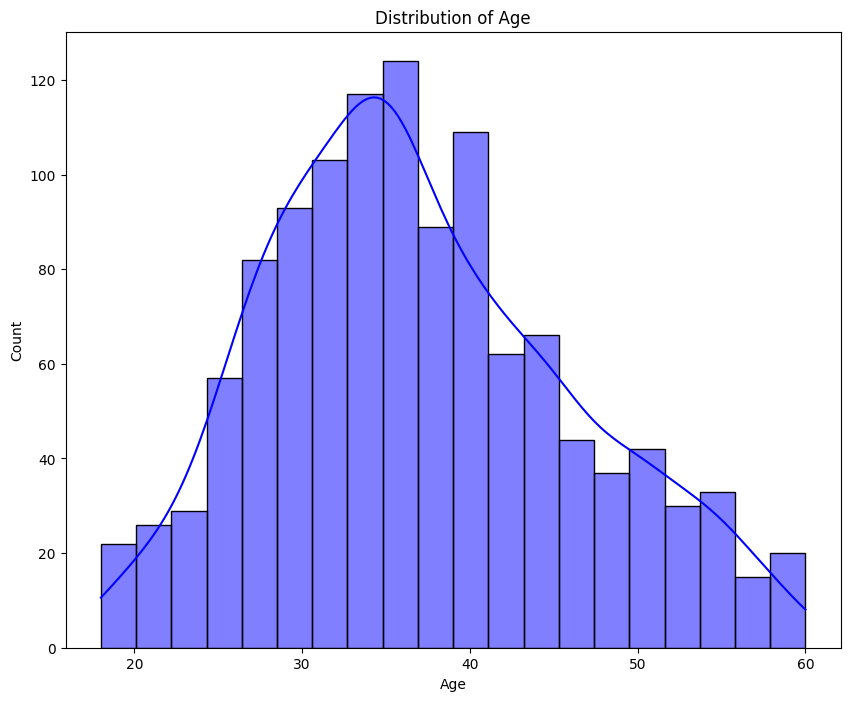

In [58]:
plt.figure(figsize=(10,8))
sns.histplot(df['Age'], bins=20, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

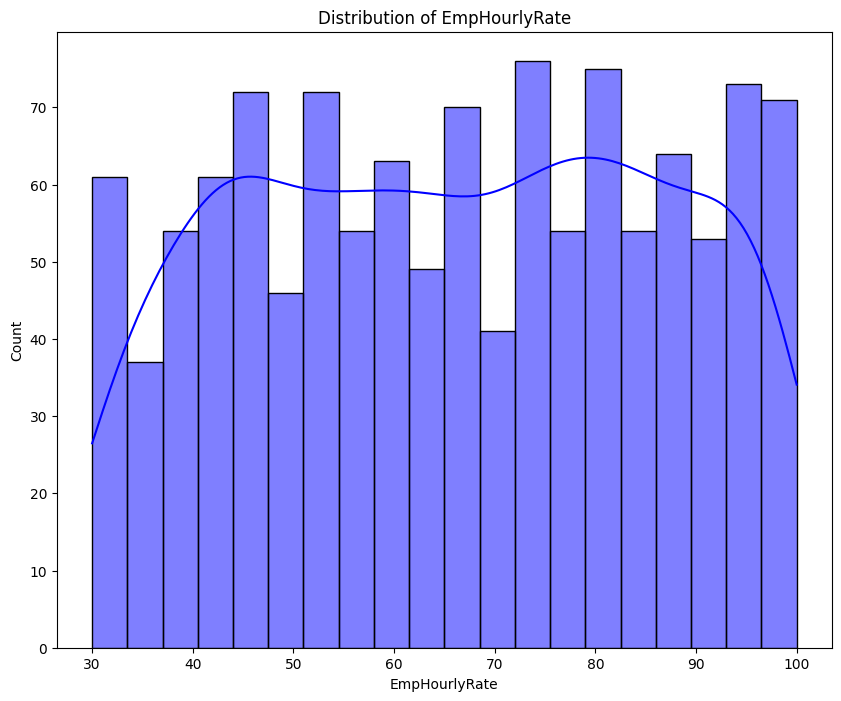

In [59]:
plt.figure(figsize=(10,8))
sns.histplot(df['EmpHourlyRate'], bins=20, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of EmpHourlyRate')
plt.xlabel('EmpHourlyRate')
plt.ylabel('Count')
plt.show()

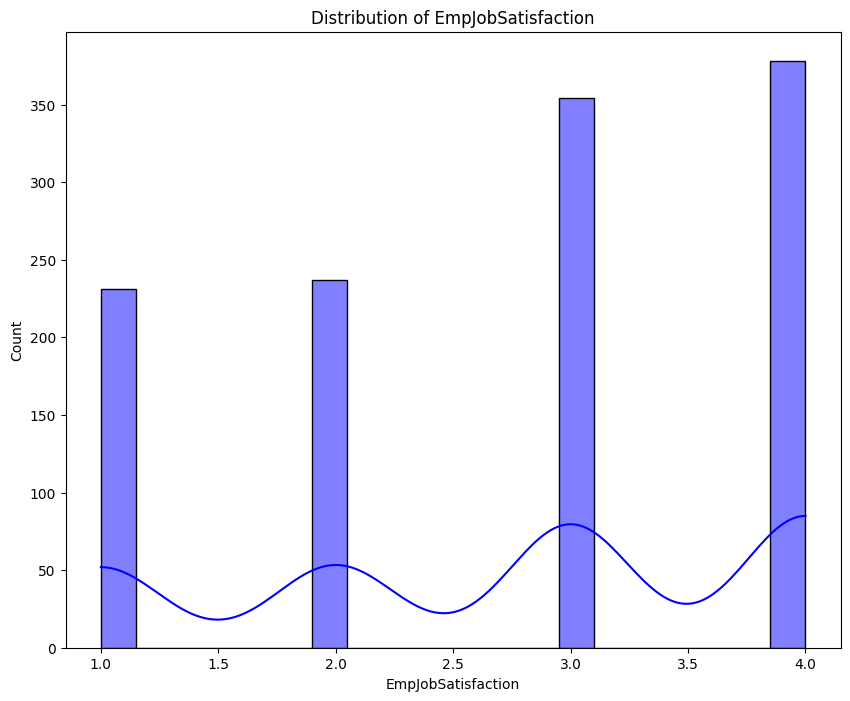

In [60]:
plt.figure(figsize=(10,8))
sns.histplot(df['EmpJobSatisfaction'], bins=20, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of EmpJobSatisfaction')
plt.xlabel('EmpJobSatisfaction')
plt.ylabel('Count')
plt.show()

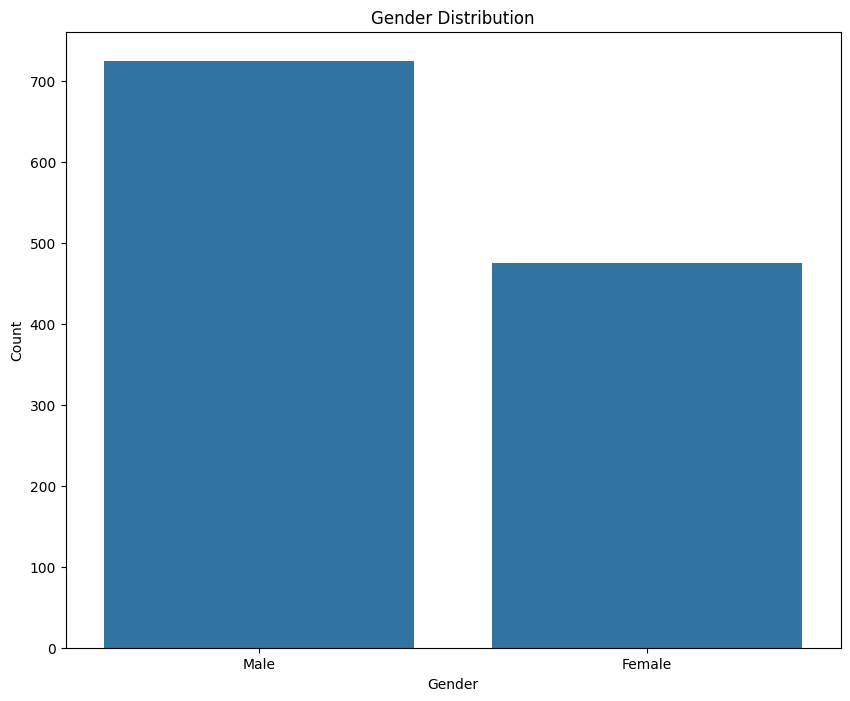

In [61]:
#Categorical Features
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(10,8))
# Pass the Series gender_counts directly to the barplot function
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

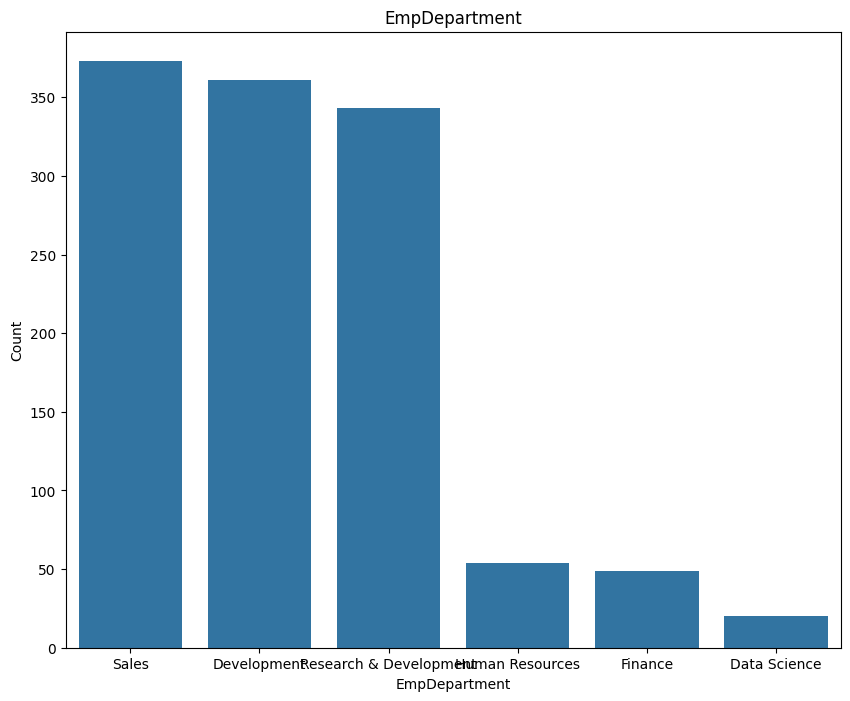

In [62]:
EmpDepartment_counts = df['EmpDepartment'].value_counts()

plt.figure(figsize=(10,8))
sns.barplot(x=EmpDepartment_counts.index, y=EmpDepartment_counts.values)
plt.title('EmpDepartment')
plt.xlabel('EmpDepartment')
plt.ylabel('Count')
plt.show()

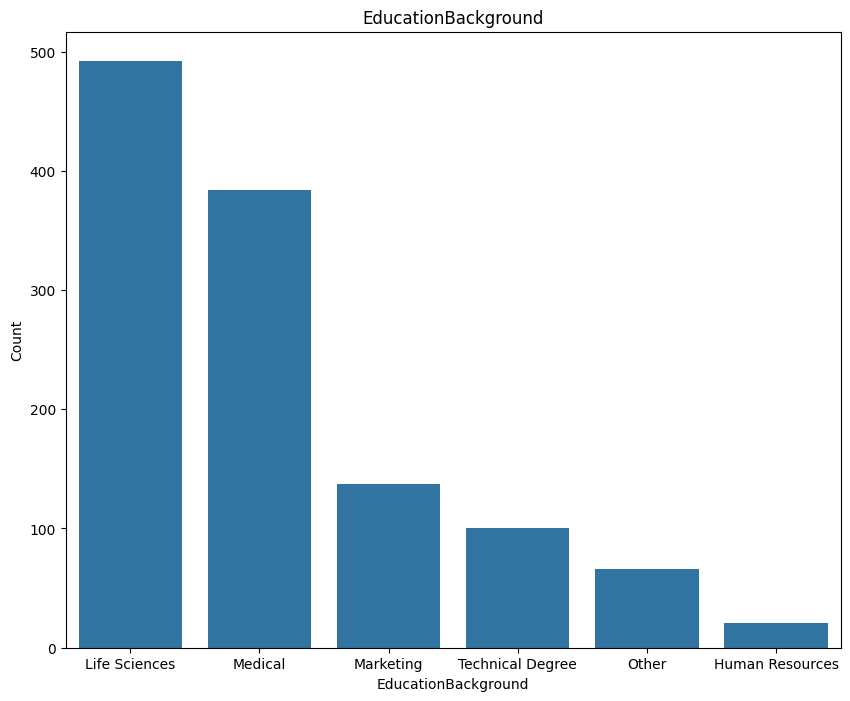

In [63]:
EducationBackground_counts = df['EducationBackground'].value_counts()

plt.figure(figsize=(10,8))
sns.barplot(x=EducationBackground_counts.index, y=EducationBackground_counts.values)
plt.title('EducationBackground')
plt.xlabel('EducationBackground')
plt.ylabel('Count')
plt.show()

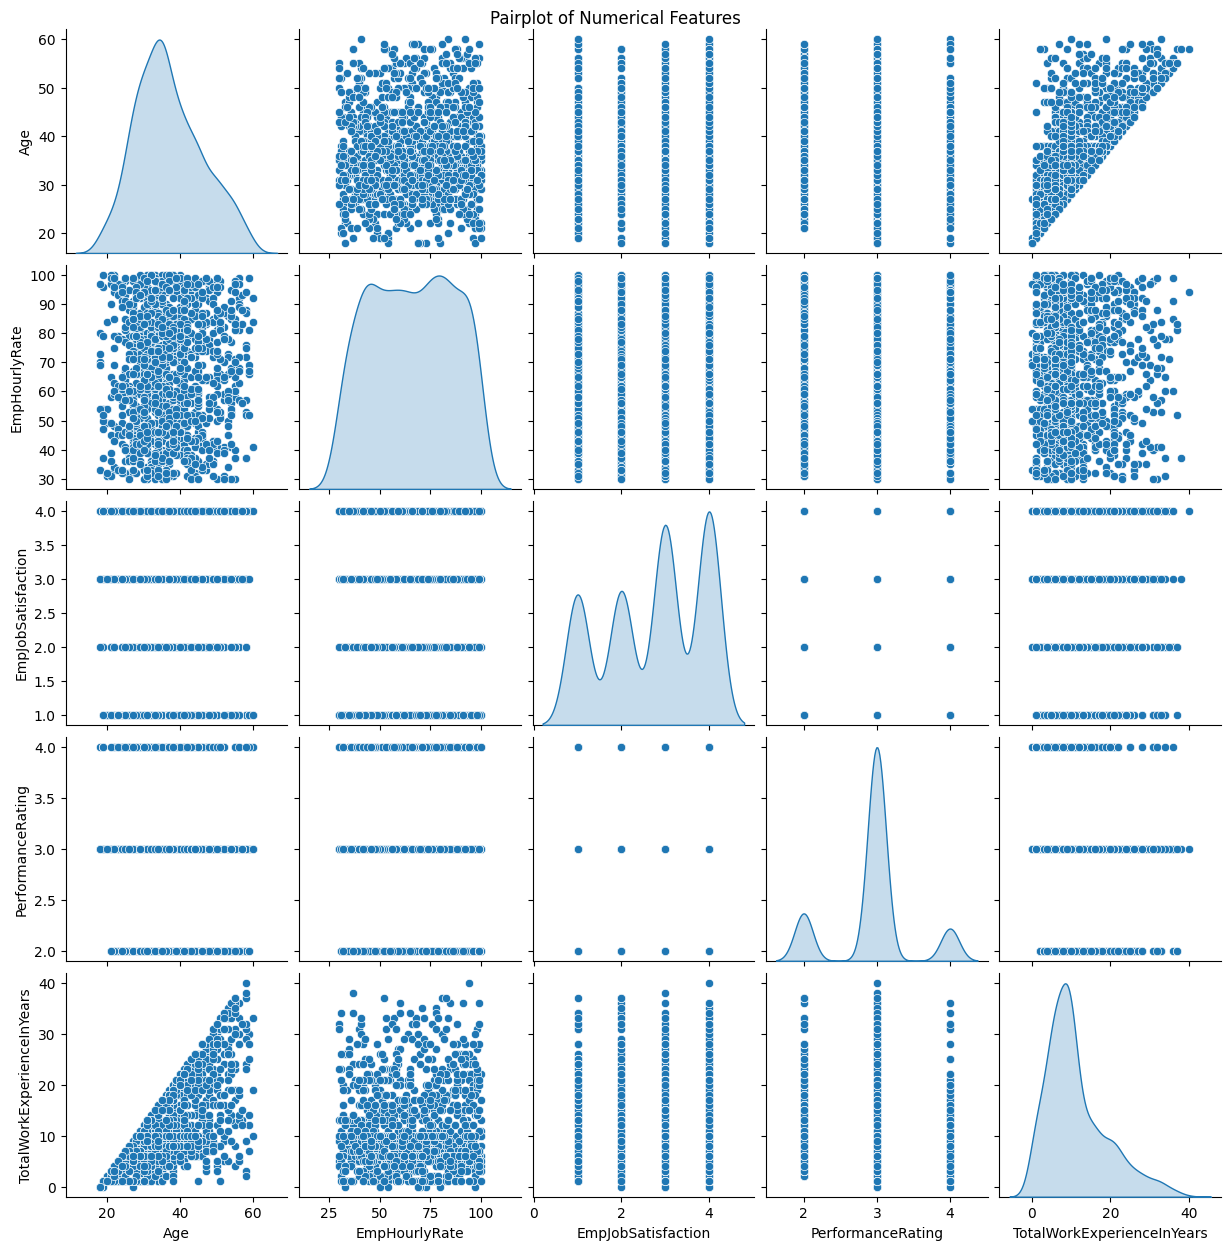

In [64]:
#Data Relationship Analysis
#Pairplot
sns.pairplot(df[['Age', 'EmpHourlyRate', 'EmpJobSatisfaction','PerformanceRating','TotalWorkExperienceInYears']], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features', y=1)
plt.show()

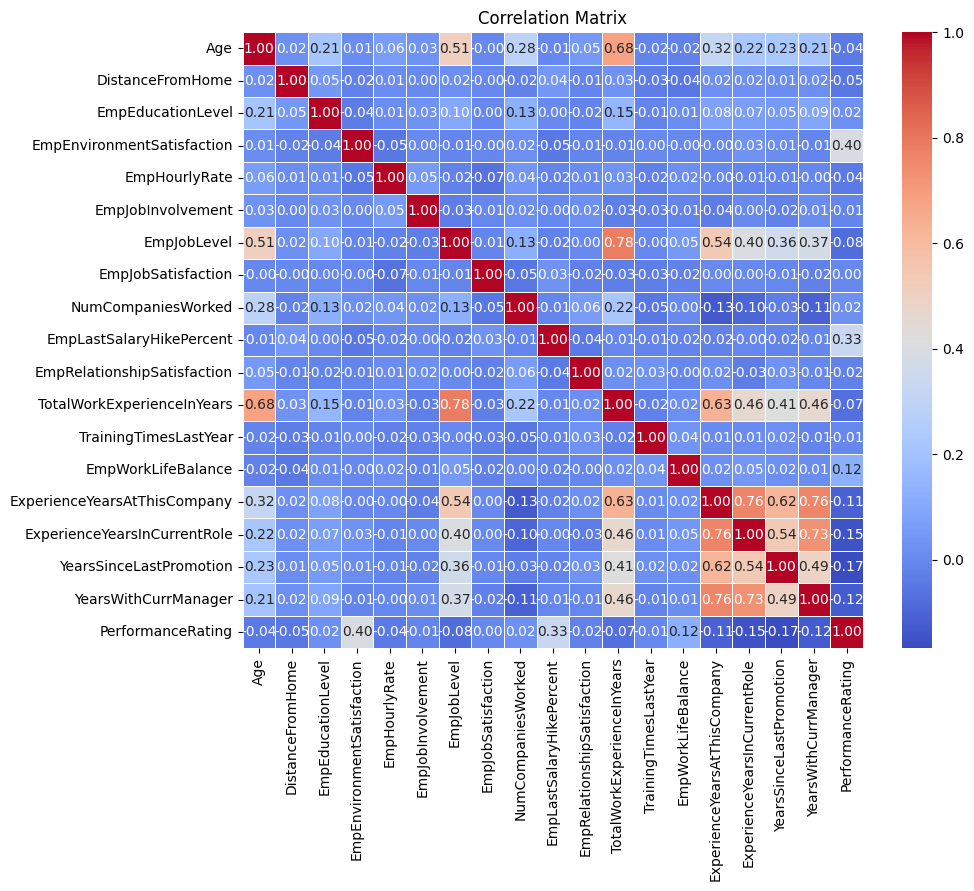

In [65]:
#Correlation Matrix
# Select only numeric columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

# Calculate correlation on the numerical dataframe
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

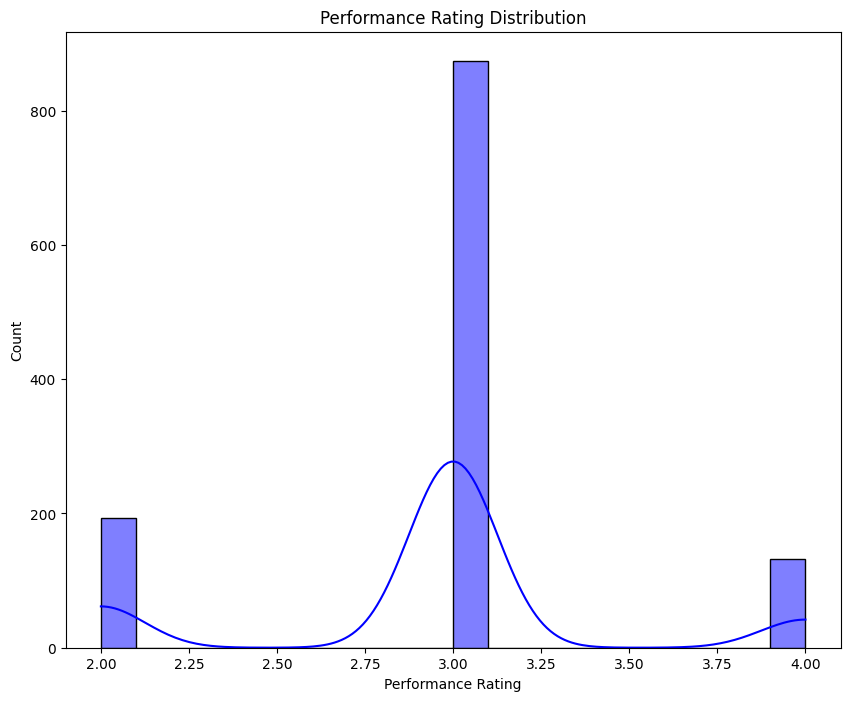

In [67]:
plt.figure(figsize=(10,8))
sns.histplot(df['PerformanceRating'], bins=20, kde=True, color='blue', edgecolor='black')
plt.title('Performance Rating Distribution')
plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.show()